In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [2]:
data=pd.read_excel('equi2020.xlsx',engine='openpyxl')

In [3]:
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)
data=data.drop('N TL',axis=1)
data=data.drop('COM',axis=1)

In [4]:
#numerical_data = data.select_dtypes(exclude=['object'])
correlations = data.corr()['NTLBIN']
#print(correlations)
threshold = -0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)



Corrélations supérieures à -0.3 :
SumOfNB_EQUIP     0.121775
SumOfNB_EQUIP1    0.106324
SumOfNB_EQUIP2    0.118694
NTLBIN            1.000000
Name: NTLBIN, dtype: float64


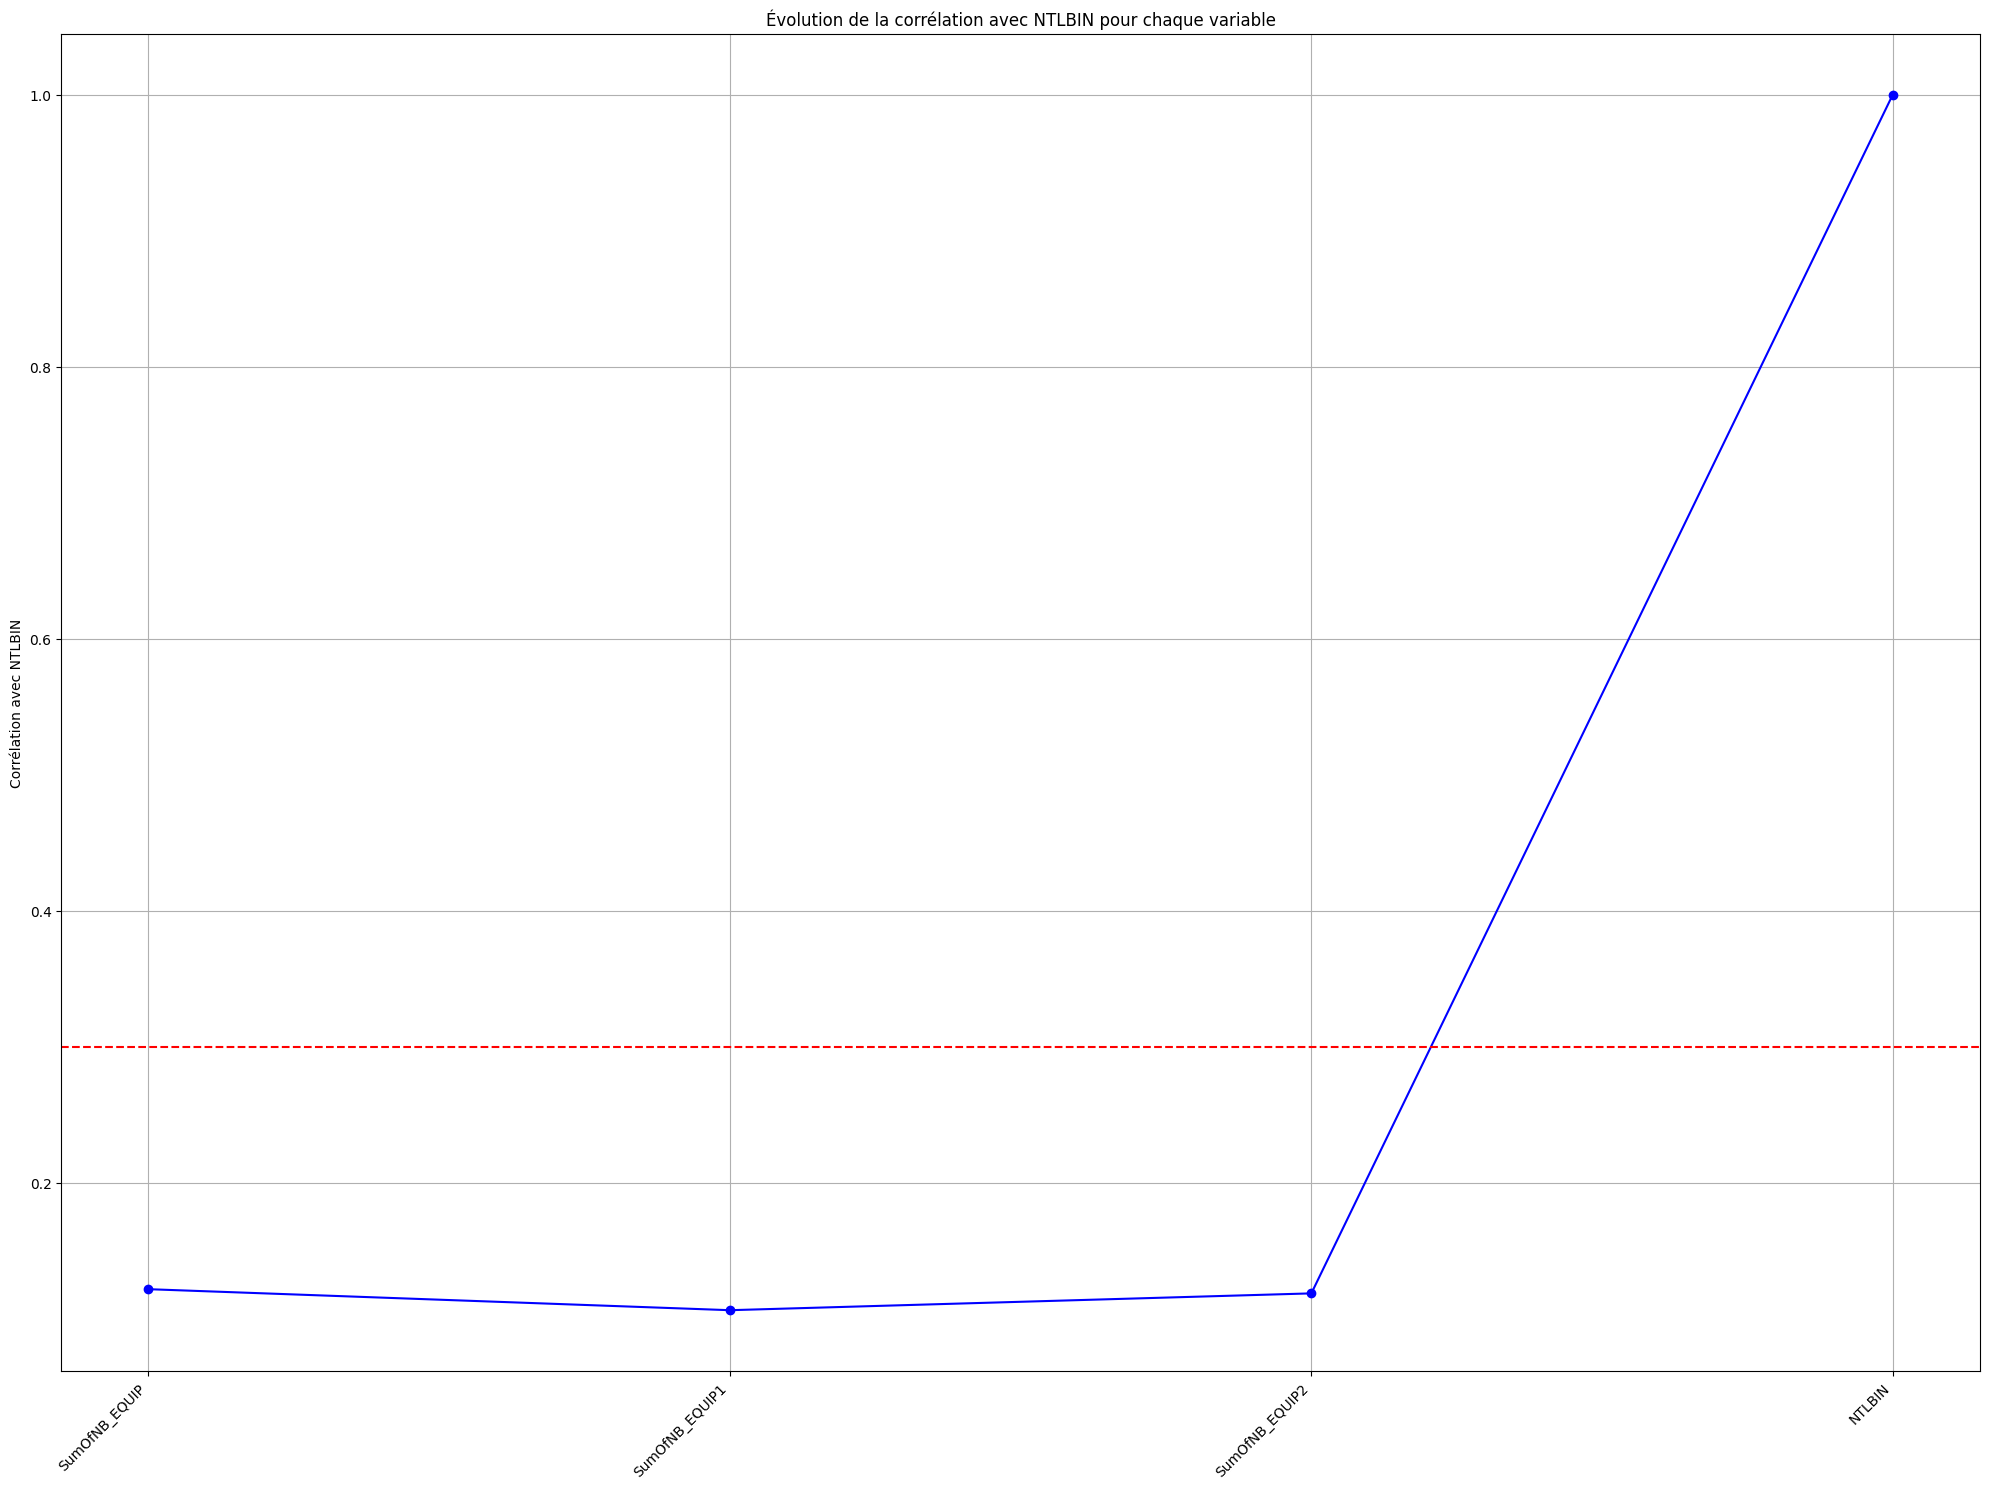

In [6]:
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [7]:
X=data.drop('NTLBIN',axis=1)


y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.689869
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 2749
Model:                          Logit   Df Residuals:                     2746
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Jun 2024   Pseudo R-squ.:                  -1.755
Time:                        16:23:07   Log-Likelihood:                -1896.5
converged:                       True   LL-Null:                       -688.35
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
SumOfNB_EQUIP   1.778e-06   2.59e-06      0.687      0.492   -3.29e-06    6.85e-06
SumOfNB_EQUIP1   

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[516   1]
 [ 29   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       517
           1       0.80      0.12      0.21        33

    accuracy                           0.95       550
   macro avg       0.87      0.56      0.59       550
weighted avg       0.94      0.95      0.93       550


Accuracy Score:
0.9454545454545454


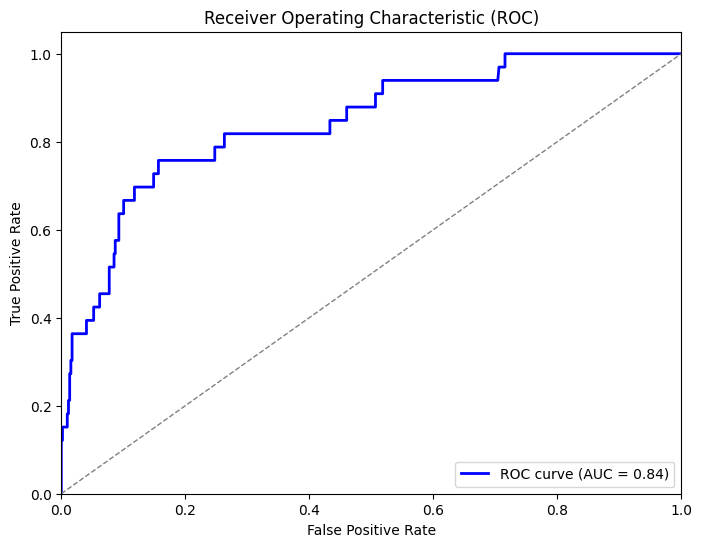

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()